In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: prova3ranks
Current folders are:
prova3ranks.0
prova3ranks.1
prova3ranks.2


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors","total lost production", \
          "total cost of lost production", "cost of labor", "cost of capital", "cost of substitution", "production type"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

                

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [7]:
#example
retrieveFirmBalancesheet(0,0)

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.0,150.210482,31.2,-119.010482,31.2,9.117765,24.0,126.210482,0.000000,0.0,80.0,70.210482,58.508735,1.0
1,0.0,31.2,150.210482,80.6,-100.810482,49.4,14.536188,38.0,112.210482,0.000000,0.0,80.0,70.210482,58.508735,1.0
2,0.0,80.6,150.210482,132.6,-98.210482,52.0,14.709595,40.0,110.210482,0.000000,0.0,80.0,70.210482,58.508735,1.0
3,0.0,132.6,150.210482,213.2,-69.610482,80.6,22.843991,62.0,88.210482,0.000000,0.0,80.0,70.210482,58.508735,1.0
4,0.0,213.2,150.210482,234.0,-129.410482,20.8,20.740153,72.0,78.210482,21.673694,56.0,80.0,70.210482,58.508735,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,10748.4,120.756162,10894.0,24.843838,145.6,43.247100,112.0,8.756162,0.000000,0.0,60.0,60.756162,50.630135,1.0
96,0.0,10894.0,120.756162,11003.2,-11.556162,109.2,31.171547,84.0,36.756162,0.000000,0.0,60.0,60.756162,50.630135,1.0
97,0.0,11003.2,120.756162,11096.8,-27.156162,93.6,26.615725,72.0,48.756162,0.000000,0.0,60.0,60.334244,0.000000,1.0
98,0.0,11096.8,120.334244,11193.0,-24.134244,96.2,26.779161,74.0,46.334244,0.000000,0.0,60.0,59.915257,0.000000,1.0


# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,645.0,0.000000e+00,10882.882801,2.487367e+03,-8395.516135,2487.366667,781.642858,2097.083333,8785.799468,45.295151,114.750000,6167.0,4715.882801,3929.902334,30.0
1,645.0,2.487367e+03,10882.882801,6.989967e+03,-6380.282801,4502.600000,1440.565619,3905.416667,6977.466135,133.636848,331.083333,6167.0,4715.882801,3929.902334,30.0
2,645.0,6.989967e+03,10882.882801,1.255802e+04,-5314.824468,5568.058333,1841.682971,4873.916667,6008.966135,186.337313,482.500000,6167.0,4715.882801,3929.902334,30.0
3,645.0,1.255802e+04,10882.882801,1.886129e+04,-4579.616135,6303.266667,2161.125074,5830.916667,5051.966135,349.447232,870.583333,6167.0,4715.882801,3929.902334,30.0
4,645.0,1.886129e+04,10882.882801,2.612897e+04,-3615.199468,7267.683333,2461.141284,6529.583333,4353.299468,316.511249,813.083333,6167.0,4715.882801,3929.902334,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,645.0,1.191703e+06,16790.203375,1.204874e+06,-3619.186709,13171.016667,4943.811505,13106.166667,3684.036709,1043.448571,2581.000000,9343.0,7491.742141,3922.219331,30.0
96,645.0,1.204874e+06,16834.742141,1.217269e+06,-4439.667141,12395.075000,4837.454188,12918.083333,3916.658807,1170.165432,2996.500000,9304.0,7493.588927,3931.052225,30.0
97,645.0,1.217269e+06,16797.588927,1.230473e+06,-3593.997260,13203.591667,4833.568922,12771.333333,4026.255594,879.881449,2245.250000,9304.0,7486.072058,3711.206550,30.0
98,645.0,1.230473e+06,16790.072058,1.244999e+06,-2264.147058,14525.925000,4988.531113,13095.416667,3694.655392,605.695923,1526.000000,9297.0,7487.146578,3718.547444,30.0


In [10]:
allFirmData.__description__

'all firms'

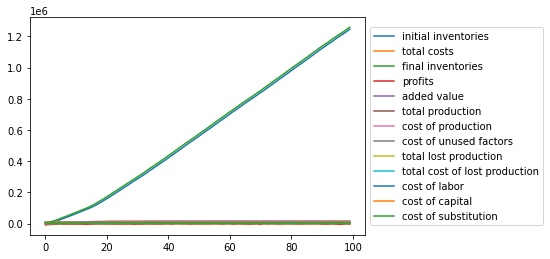

In [11]:
allFirmData.drop(['firm class type', 'production type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

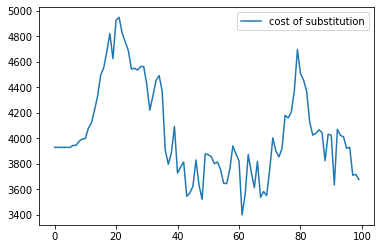

In [12]:
allFirmData[['cost of substitution']].plot()

In [ ]:
allFirmData[['total production']].plot()

<AxesSubplot: >

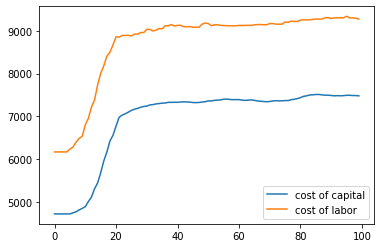

In [13]:
allFirmData[['cost of capital','cost of labor']].plot()

# Considering groups of firms

In [14]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [15]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 30 firms


In [16]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [17]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.0,3886.006020,699.4,-3186.606020,699.4,206.132391,560.0,3326.006020,8.007402,22.0,2021.0,1865.006020,1554.171684,30.0
1,0.0,699.4,3886.006020,2054.0,-2531.406020,1354.6,409.225212,1112.0,2774.006020,26.312083,70.0,2021.0,1865.006020,1554.171684,30.0
2,0.0,2054.0,3886.006020,3697.2,-2242.806020,1643.2,533.823254,1522.0,2364.006020,99.494869,258.0,2021.0,1865.006020,1554.171684,30.0
3,0.0,3697.2,3886.006020,5894.2,-1689.006020,2197.0,704.670126,1950.0,1936.006020,102.068395,260.0,2021.0,1865.006020,1554.171684,30.0
4,0.0,5894.2,3886.006020,8769.8,-1010.406020,2875.6,907.691026,2476.0,1410.006020,98.727126,264.0,2021.0,1865.006020,1554.171684,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,328226.6,4210.249011,332131.8,-305.049011,3905.2,1289.464006,3536.0,674.249011,204.348500,532.0,2050.0,2160.796166,1193.567477,30.0
96,0.0,332131.8,4210.796166,334947.6,-1394.996166,2815.8,1215.426830,3496.0,714.796166,491.770918,1330.0,2052.0,2160.735158,1252.127217,30.0
97,0.0,334947.6,4212.735158,338392.6,-767.735158,3445.0,1211.743142,3424.0,788.735158,287.874242,774.0,2052.0,2156.102996,1136.510071,30.0
98,0.0,338392.6,4208.102996,342453.8,-146.902996,4061.2,1286.409344,3536.0,672.102996,157.228243,412.0,2052.0,2151.854469,1070.443199,30.0


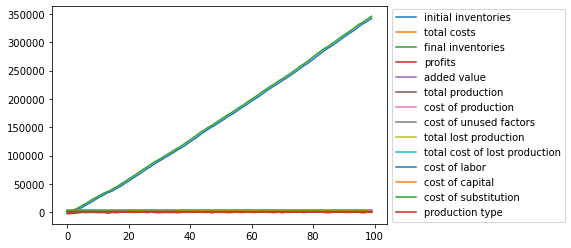

In [18]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

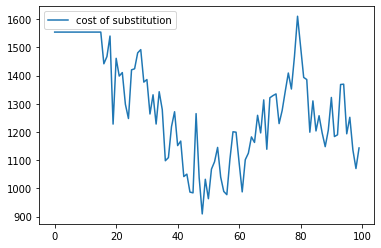

In [19]:
sumOfBalanceSheetSubset[['cost of substitution']].plot()

<AxesSubplot: >

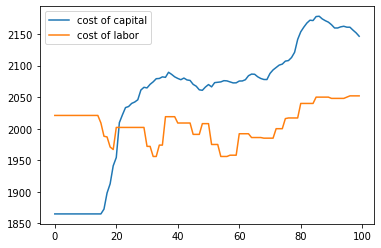

In [20]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [21]:
allFirmData[['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.000000e+00,2487.366667,2.487367e+03
1,2.487367e+03,4502.600000,6.989967e+03
2,6.989967e+03,5568.058333,1.255802e+04
3,1.255802e+04,6303.266667,1.886129e+04
4,1.886129e+04,7267.683333,2.612897e+04
...,...,...,...
95,1.191703e+06,13171.016667,1.204874e+06
96,1.204874e+06,12395.075000,1.217269e+06
97,1.217269e+06,13203.591667,1.230473e+06
98,1.230473e+06,14525.925000,1.244999e+06
